# **Importing libraries**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

# **Diabetes**

## **Importing data and data preparation**

In [ ]:
data_diabetes = pd.read_csv('/content/diabetes.csv')
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **EDA**

In [ ]:
data_diabetes.shape

(768, 9)

In [ ]:
data_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Fortunately we have no missing data and no categorical data!

<Axes: >

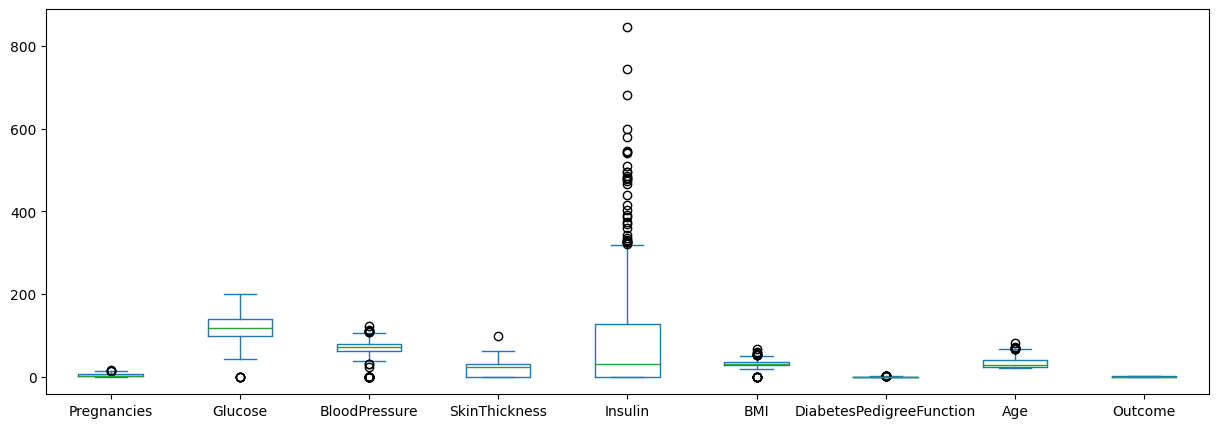

In [ ]:
data_diabetes.plot(kind = 'box', figsize = (15, 5))

Well! we have outliars in insulin!

In [ ]:
Q1 = data_diabetes['Insulin'].quantile(0.25)
Q3 = data_diabetes['Insulin'].quantile(0.75)
IQR = Q3 - Q1
print(f"Number of outliars in Insulin feature: {len(data_diabetes.loc[(data_diabetes['Insulin'] < (Q1 - 1.5 * IQR)) | (data_diabetes['Insulin'] > (Q3 + 1.5 * IQR))])}")

Number of outliars in Insulin feature: 34


Let's store their indexes to determine whether to remove them or not

In [ ]:
outliars_idx = data_diabetes.loc[(data_diabetes['Insulin'] < (Q1 - 1.5 * IQR)) | (data_diabetes['Insulin'] > (Q3 + 1.5 * IQR))].index

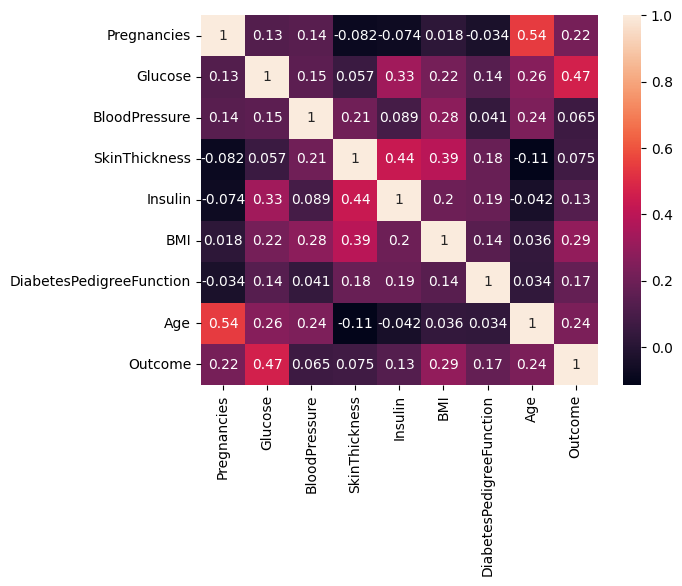

In [ ]:
sns.heatmap(data_diabetes.corr(), annot = True);

Let's keep features with corrolation values of at least 0.2

In [ ]:
important_features = [i for i, j in (data_diabetes.corr()['Outcome'] >= 0.2).items() if j == 1]
important_features.remove('Outcome')
important_features

['Pregnancies', 'Glucose', 'BMI', 'Age']

So, 'Insulin' is not in important features and there is no need to remove its outliars!

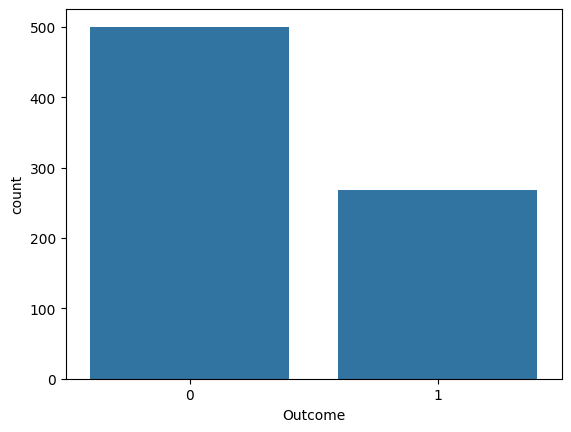

In [ ]:
sns.countplot(data = data_diabetes, x = data_diabetes['Outcome']);

As can be seen, our dataset is unbalanced!

## **Identifying inputs, output, and splitting data**

In [ ]:
x = data_diabetes[important_features].copy()
y = data_diabetes['Outcome'].copy()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.8)

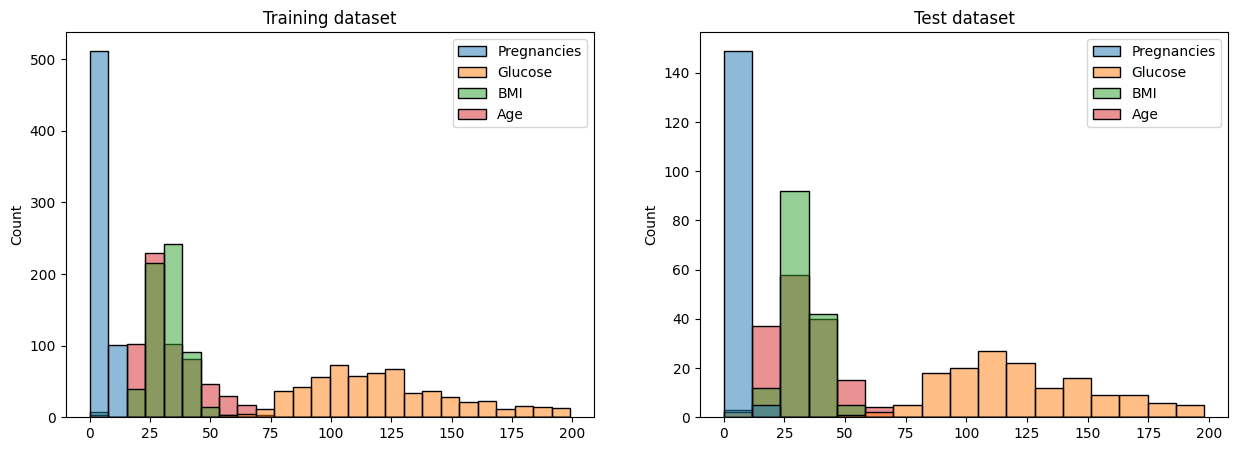

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.histplot(X_train, ax = ax[0]).set_title("Training dataset");
sns.histplot(X_test, ax = ax[1]).set_title("Test dataset");

Almost all of the features vary each others in range. So scalling them would be a good idea!

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def model_validation(model, x_train, y_train, x_test, y_test):

  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  accuracy = metrics.accuracy_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  balanced_accuracy = metrics.balanced_accuracy_score(y_test, y_pred)

  eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns = ['accuracy', 'f1', 'precision', 'recall', 'balanced_accuracy'])
  return eval_df

## **ML models**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
results_diabetes = model_validation(lg, X_train, Y_train, X_test, Y_test)
results_diabetes.index = ['Logistic Regression']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_results = model_validation(DT, X_train, Y_train, X_test, Y_test)
DT_results.index = ['Decision Tree']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF_results = model_validation(RF, X_train, Y_train, X_test, Y_test)
RF_results.index = ['Random Forest']

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_results = model_validation(xgb, X_train, Y_train, X_test, Y_test)
xgb_results.index = ['XGBoost']

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc_results = model_validation(svc, X_train, Y_train, X_test, Y_test)
svc_results.index = ['SVC']

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_results = model_validation(gnb, X_train, Y_train, X_test, Y_test)
gnb_results.index = ['GNB']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_results = model_validation(knn, X_train, Y_train, X_test, Y_test)
knn_results.index = ['KNN']

In [ ]:
results_diabetes = pd.concat([results_diabetes, DT_results, RF_results, xgb_results, svc_results, gnb_results, knn_results])
results_diabetes.sort_values(by = 'f1', ascending = False, inplace = True)
results_diabetes

,accuracy,f1,precision,recall,balanced_accuracy
SVC,0.766234,0.672727,0.660714,0.685185,0.747593
Random Forest,0.740260,0.666667,0.606061,0.740741,0.740370
GNB,0.720779,0.656000,0.577465,0.759259,0.729630
KNN,0.727273,0.655738,0.588235,0.740741,0.730370
Logistic Regression,0.740260,0.642857,0.620690,0.666667,0.723333
XGBoost,0.701299,0.616667,0.560606,0.685185,0.697593
Decision Tree,0.655844,0.601504,0.506329,0.740741,0.675370


According to the above table, SVC has the best results among different ML models.

### **Hyperparameter tuning**

In [ ]:
params = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}

In [ ]:
svc = SVC()
clf = GridSearchCV(svc, params)
clf.fit(X_train, Y_train)
clf.best_params_

{'kernel': 'linear'}

In [ ]:
svc = SVC(kernel = 'rbf')
params2 = {'gamma': ('scale', 'auto')}
clf = GridSearchCV(svc, params2)
clf.fit(X_train, Y_train)
clf.best_params_

{'gamma': 'auto'}

In [ ]:
svc = SVC(kernel = 'rbf', gamma = 'scale')
svc_results = model_validation(svc, X_train, Y_train, X_test, Y_test)
svc_results

,accuracy,f1,precision,recall,balanced_accuracy
0,0.766234,0.672727,0.660714,0.685185,0.747593
